In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import seaborn as sns
from bs4 import BeautifulSoup
#matplotlib.style.use('ggplot')
%matplotlib inline 


In [8]:
url = 'https://www.cbf.com.br/competicoes/brasileiro-serie-a/classificacao/2017#.WoRENXXwbiw'
dfs = pd.read_html(url,skiprows=1)

In [9]:
tabela = dfs[0].drop([1], axis=1)
tabela.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1º,Corinthians - SP,72.0,38.0,21.0,9.0,8.0,50.0,30.0,20.0,12.0,9.0,2.0,6.0,81.0,1.0,63.0
1,2º,Palmeiras - SP,63.0,38.0,19.0,6.0,13.0,61.0,45.0,16.0,12.0,7.0,4.0,9.0,87.0,4.0,55.0
2,3º,Santos - SP,63.0,38.0,17.0,12.0,9.0,42.0,32.0,10.0,12.0,5.0,3.0,6.0,94.0,4.0,55.0
3,4º,Grêmio - RS,62.0,38.0,18.0,8.0,12.0,55.0,36.0,19.0,10.0,8.0,5.0,7.0,69.0,2.0,54.0
4,5º,Cruzeiro - MG,57.0,38.0,15.0,12.0,11.0,47.0,39.0,8.0,9.0,6.0,3.0,8.0,87.0,5.0,50.0


In [10]:
tabela.columns = ['Posição', 'Time','Pontos', 'Jogos','Vitórias','Empates','Derrotas','Gols Feitos','Gos Contra','Saldo de gols','Vitórias mandante','Vitórias Visitante', 'Derrotas mandante','Derrotas Visitantes','Cartões amarelos','Cartões vermelhos', 'Aproveitamento']

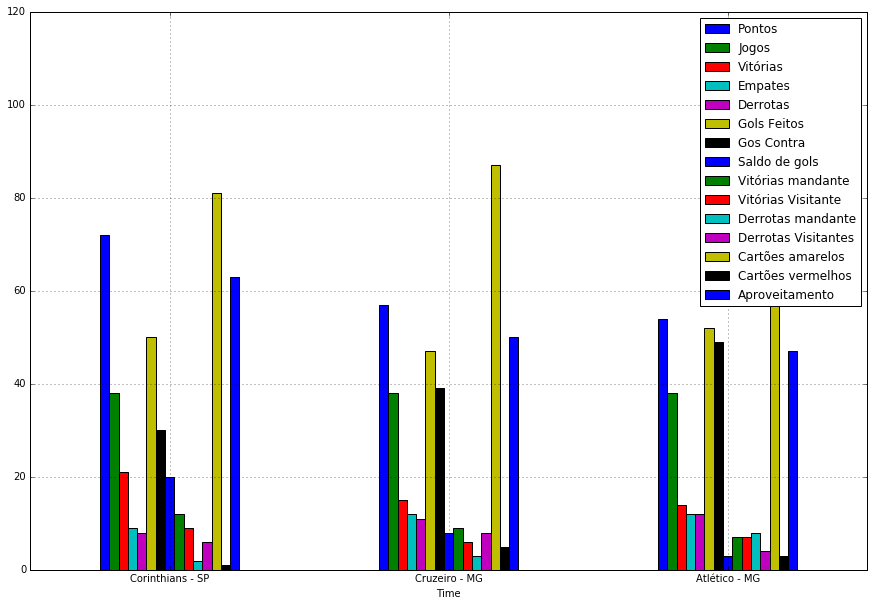

In [14]:
times = tabela.loc[[0,4,8]] 
grafico = times.plot(kind='bar',x=1,figsize=(15,10), grid=True, legend=True,rot=0)
plt.show()